# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

# !pip install bokeh

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

  Stored in directory: C:\Users\doomb\AppData\Local\pip\Cache\wheels\d6\1f\1e\068dc0337f6cd79cf2e4d396ac3935c62327514810f110dea0
Successfully built bokeh


In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [14]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

c:\users\doomb\anaconda3\envs\capstone2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


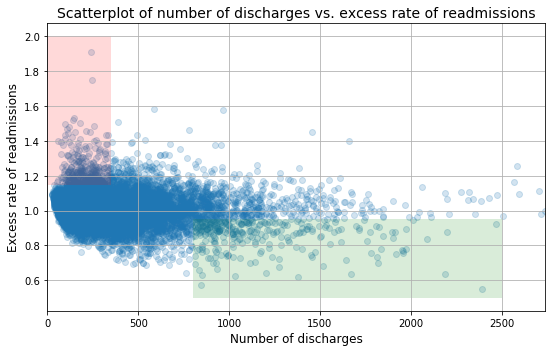

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

I agree with some aspects of this assessment and strongly disagree with others.

Immediate thoughts that come to mind when reading this report are:

1) They did not take into account things about the healthcare providers; such as: size of staff, amount of patients that can be roomed at one time, how much funding the facility has, how many facilities the city/region has for patients to go to already. Each of these things will effect the readmissions rate and will make our model much more accurate and be able to make greater change in our policies.

2) They did very minimal analysis of the data and could have gone much deeper into it and group by state, # of discharges, # of discharges/ # of readmissions. This might have revealed that certain states with more rural or spread out populations are effected more/less. That the ratio between Excess Readmission Ratio and the # of discharges/ # of readmissions Ratio might play a bigger factor in effectively creating policy then just using the Expected Ratio.

3) There is a correlation between the number of discharges and the Readmissions rate but it probably isn't the only correlation. There is probably a stronger correlation and reason behind the high rates then what is available in this dataset. If we had access to the data that I listed above in 1) we could create a better regression model to see what is really causing this problem and address it better. 

Since I don't have the data required to do all of the analysis I would like I will only be able to fix what I think they did wrong in this report.

In [82]:
# Further clean the NaN values
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] !=0]
clean_hospital_read_df = clean_hospital_read_df.drop('Footnote', axis=1)
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [83]:
# Redefine x and y
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

In [115]:
# First I will create new features and groupings to do analysis on.
states = clean_hospital_read_df.groupby(by='State', axis=0).mean()

clean_hospital_read_df['Actual Rate'] = (clean_hospital_read_df['Number of Readmissions']/clean_hospital_read_df['Number of Discharges'])

states.sort_values('Excess Readmission Ratio')

,Provider Number,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Actual Rate
State,,,,,,,
SD,430031.560976,355.926829,0.909824,14.331707,15.643902,38.926829,0.130053
MT,270028.636364,288.568182,0.910461,14.031818,15.354545,30.545455,0.124827
ID,130017.425000,301.200000,0.918378,14.615000,15.890000,32.500000,0.129297
ND,350018.793103,417.793103,0.919466,14.937931,16.031034,49.379310,0.139418
NE,280061.370370,358.506173,0.931769,15.337037,16.228395,45.493827,0.143784
OR,380041.833333,253.537037,0.943070,15.923148,16.750000,32.509259,0.147224
VT,470008.238095,380.571429,0.947548,17.023810,17.842857,58.095238,0.160290
UT,460020.679245,271.433962,0.951774,14.105660,15.003774,27.943396,0.128671
CO,60042.830769,270.776923,0.952012,15.814615,16.681538,32.576923,0.144930


My intuition was correct. We see that the actual rate correlates with the Ratio almost perfectly.

We also see that the distribution of readmission rate is not standard for each state and that some states out perform other states. This is likely due to several reasons: State population, Population Density, State Regulations, and State Income Level.

Accounting for these extra factors as well as getting more information will help us create a better policy.

In [112]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Actual Rate
count,11497.000000,11497.000000,11497.000000,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,1.007504,17.984292,17.865695,63.633731,0.182337
std,154274.374018,308.754590,0.091964,5.487651,5.240749,59.540296,0.064152
min,10001.000000,25.000000,0.549500,2.700000,3.900000,11.000000,0.017794
25%,110129.000000,160.000000,0.952600,16.300000,16.600000,24.000000,0.150579
50%,250042.000000,282.000000,1.003500,19.000000,19.000000,45.000000,0.188755
75%,390039.000000,474.000000,1.058100,21.500000,21.400000,82.000000,0.223301
max,670082.000000,6793.000000,1.909500,32.800000,28.000000,879.000000,0.480000


Here we see that the difference in top perfomers and bottom performers are massive. With the average being higher then 1 at almost all levels. We also see that the lowest and highest number of discharges and readmissions are not at a constant rate. With the lowest being 25/11 and the highest being 6793/879.

This all suggests that the first model was too naive and that a new policy should be created after we look into the new factors and figure out the reason for the discrepancies we see between states and the best and worst performers.

In [128]:
# Define states' x and y
nx = [a for a in states['Number of Discharges']]
ny = list(states['Excess Readmission Ratio'])

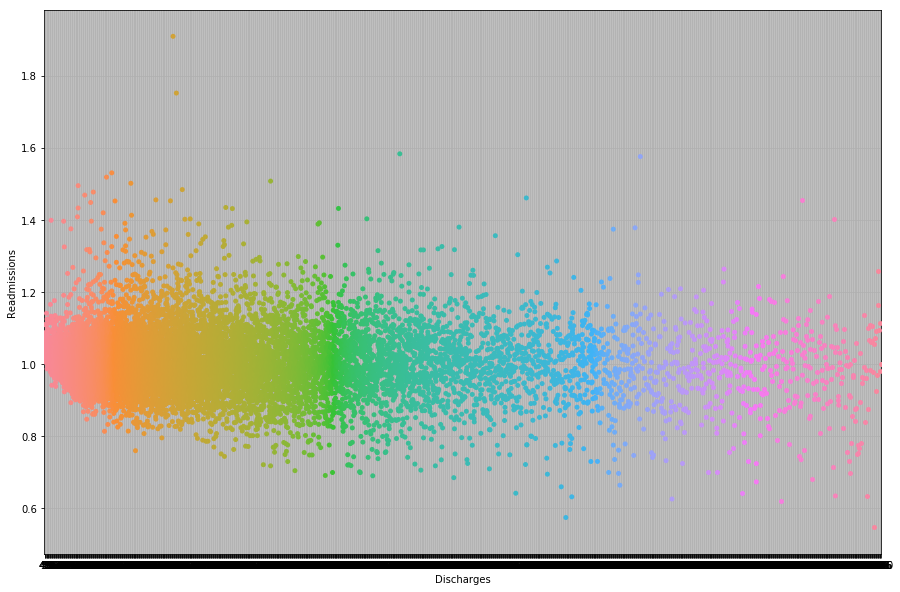

In [133]:
import seaborn as sns

plt.subplots(figsize=(15,10))

_ = sns.swarmplot(x=x, y=y)


_ = plt.xlabel('Discharges')
_ = plt.ylabel('Readmissions')


plt.grid(True)

plt.show()

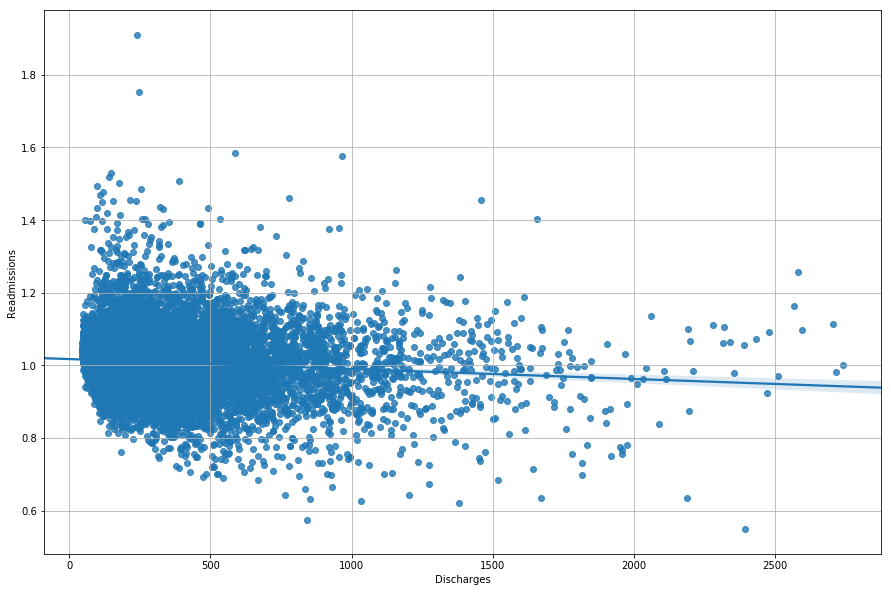

In [134]:
plt.subplots(figsize=(15,10))

_ = sns.regplot(x=x, y=y)


_ = plt.xlabel('Discharges')
_ = plt.ylabel('Readmissions')

plt.grid(True)
plt.show()

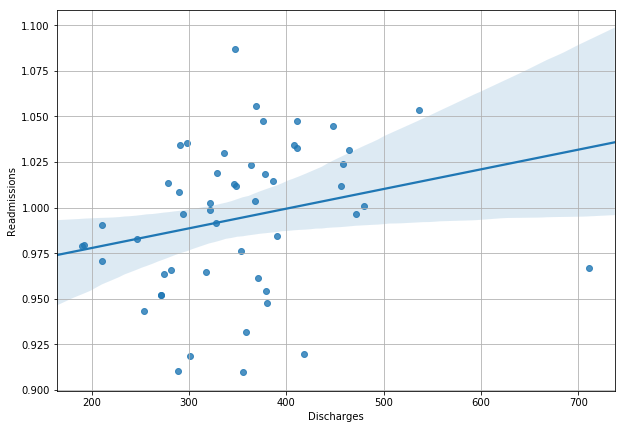

In [135]:
plt.subplots(figsize=(10,7))

_ = sns.regplot(x=nx, y=ny)


_ = plt.xlabel('Discharges')
_ = plt.ylabel('Readmissions')

plt.grid(True)
plt.show()